In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
chexpert_df = pd.read_csv('/content/chexpert_df.csv', index_col = 0)
montgomery_shenzhen_df = pd.read_csv('/content/montgomery_shenzhen_df.csv', index_col = 0)
nih_df = pd.read_csv('/content/nih_df.csv', index_col = 0)
vinbigdata_df = pd.read_csv('/content/vinbigdata_df.csv', index_col = 0)

In [92]:
chexpert_df.rename(columns = {'Lung Opacity': 'Opacity', 'Lung Lesion': 'Lesion',
                    'Pleural Effusion': 'Effusion'}, inplace = True)

nih_df.rename(columns = {'Pleural_Thickening': 'Thickening'},
              inplace = True)
nodule, mass = list(nih_df['Nodule']), list(nih_df['Mass'])
nih_df['Nodule/Mass'] = nodule or mass
nih_df = nih_df.drop(['Nodule', 'Mass'], axis = 1)

vinbigdata_df.rename(columns = {'pneumothorax': 'Pneumothorax', 'atelectasis': 'Atelectasis',
                                'consolidation': 'Consolidation', 'opacity': 'Opacity', 
                                'nodule_mass': 'Nodule/Mass', 'thickening': 'Thickening', 
                                'fibrosis': 'Fibrosis', 'effusion': 'Effusion', 
                                'infiltration': 'Infiltration'}, inplace = True)

In [93]:
columns = ['Dataset', 'Path', 'Sex', 'Opacity', 'Lesion', 'Edema', 
           'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 
           'Effusion', 'Tuberculosis', 'Infiltration', 'Nodule/Mass', 
           'Emphysema', 'Thickening', 'Fibrosis']

In [94]:
chexpert_df['Tuberculosis'] = [0.0] * len(chexpert_df)
chexpert_df['Infiltration'] = [0.0] * len(chexpert_df)
chexpert_df['Nodule/Mass'] = [0.0] * len(chexpert_df)
chexpert_df['Emphysema'] = [0.0] * len(chexpert_df)
chexpert_df['Thickening'] = [0.0] * len(chexpert_df)
chexpert_df['Fibrosis'] = [0.0] * len(chexpert_df)
chexpert_df = chexpert_df[columns]

In [ ]:
montgomery_shenzhen_df['Opacity'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Lesion'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Edema'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Consolidation'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Pneumonia'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Atelectasis'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Pneumothorax'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Effusion'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Infiltration'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Nodule/Mass'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Emphysema'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Thickening'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df['Fibrosis'] = [0.0] * len(montgomery_shenzhen_df)
montgomery_shenzhen_df = montgomery_shenzhen_df[columns]
montgomery_shenzhen_df['Tuberculosis'].replace({1: 1.0}, inplace = True)

In [96]:
nih_df['Opacity'] = [0.0] * len(nih_df)
nih_df['Lesion'] = [0.0] * len(nih_df)
nih_df['Pneumothorax'] = [0.0] * len(nih_df)
nih_df['Tuberculosis'] = [0.0] * len(nih_df)
nih_df = nih_df[columns]

In [97]:
vinbigdata_df['Lesion'] = [0.0] * len(vinbigdata_df)
vinbigdata_df['Edema'] = [0.0] * len(vinbigdata_df)
vinbigdata_df['Pneumonia'] = [0.0] * len(vinbigdata_df)
vinbigdata_df['Atelectasis'] = [0.0] * len(vinbigdata_df)
vinbigdata_df['Tuberculosis'] = [0.0] * len(vinbigdata_df)
vinbigdata_df['Emphysema'] = [0.0] * len(vinbigdata_df)
vinbigdata_df = vinbigdata_df[columns]

In [98]:
all_datasets = pd.concat((chexpert_df, montgomery_shenzhen_df, nih_df, vinbigdata_df))
all_datasets.to_csv(path_or_buf = 'all_datasets.csv', columns = columns)

In [109]:
count_findings = list()
for finding in columns[3:]:
  count = list(all_datasets[finding].value_counts())[1]
  count_findings.append(count)

Text(0, 0.5, 'Imagens')

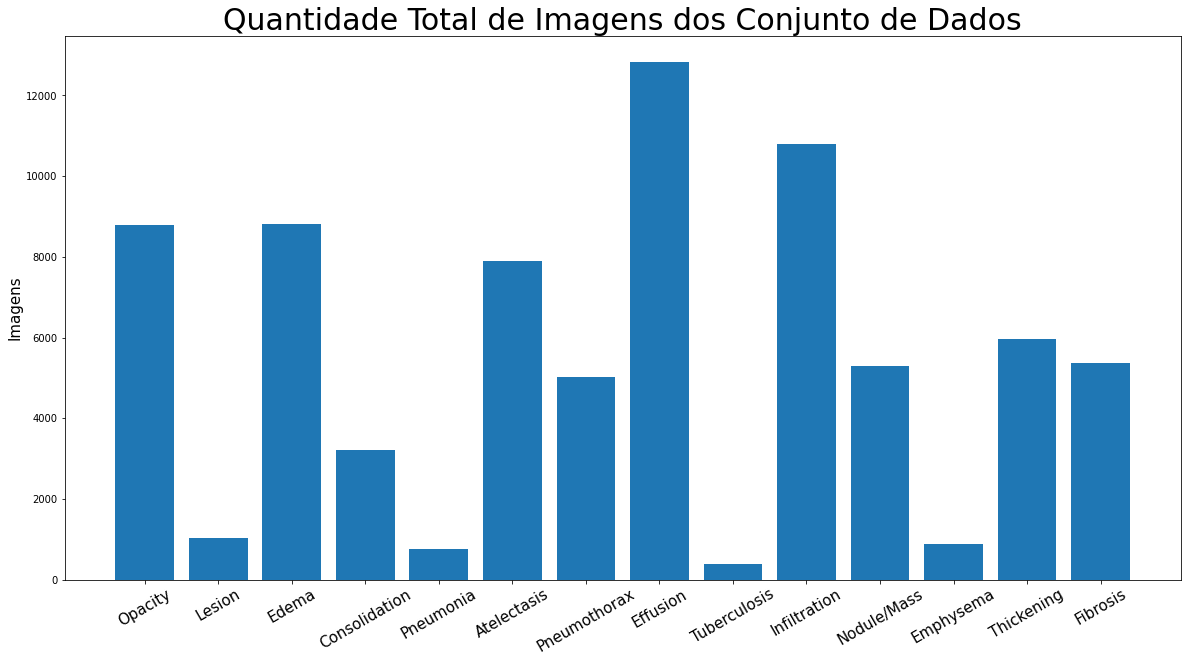

In [120]:
plt.figure(figsize = (20, 10))
plt.bar(columns[3:], count_findings)
plt.xticks(rotation = 30, size = 15)
plt.title('Quantidade Total de Imagens dos Conjunto de Dados', size = 30)
plt.ylabel('Imagens', size = 15)